In [ ]:
import pandas as pd
csv_file_path1 = r"C:\Users\PC\Downloads\cleaned_data_v1.csv"

df = pd.read_csv(csv_file_path1)
df

In [82]:
import pandas as pd

num_rows, num_cols = df.shape

print(f'Number of Rows:{num_rows}')
print(f'Number of Columns:{num_cols}')

Number of Rows:10674
Number of Columns:27


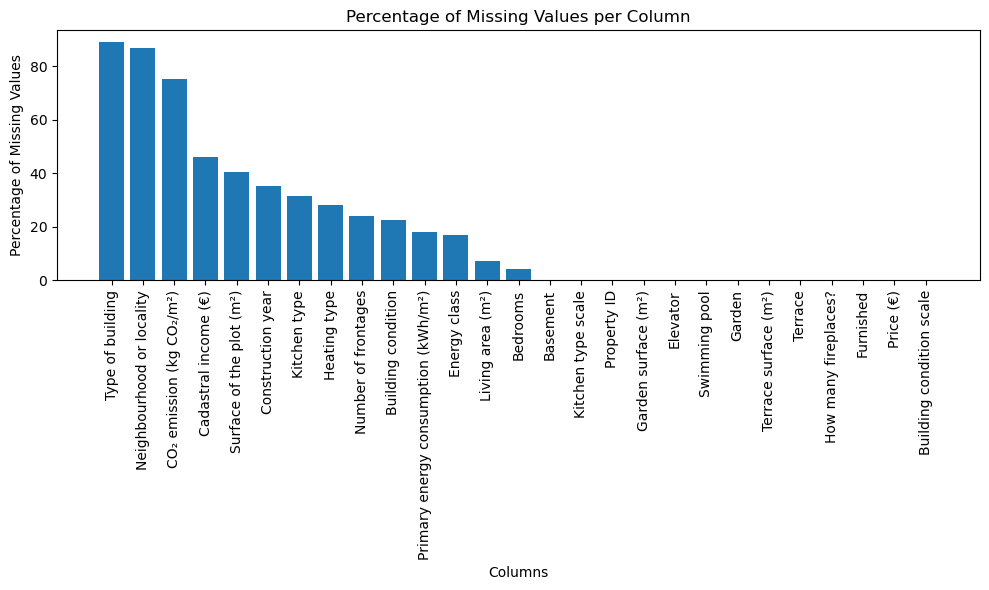

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_percentage = missing_percentage.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(missing_percentage.index, missing_percentage)
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.title('Percentage of Missing Values per Column')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


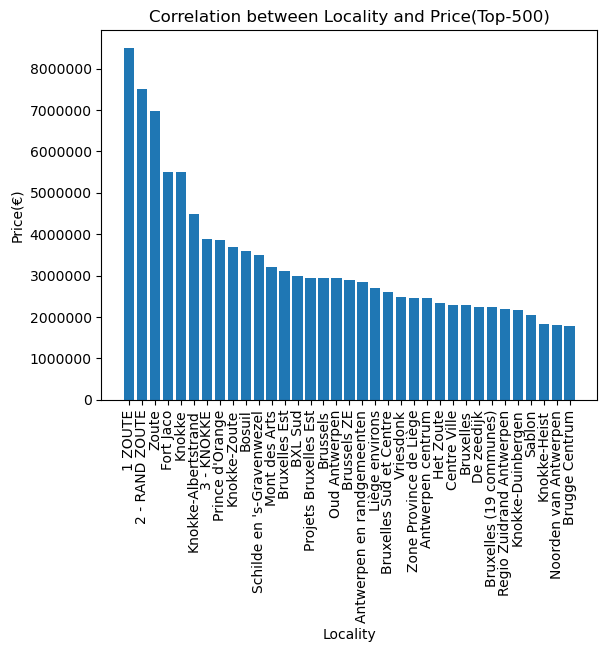

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

sorted_df = df.sort_values('Price (€)', ascending=False)  
top_500 = sorted_df.head(500) 

locality_price = top_500[['Neighbourhood or locality', 'Price (€)']]
locality_price = locality_price.dropna()

plt.bar(locality_price['Neighbourhood or locality'], locality_price['Price (€)'])
plt.xlabel('Locality')
plt.ylabel('Price(€)')
plt.title('Correlation between Locality and Price(Top-500)')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.show()


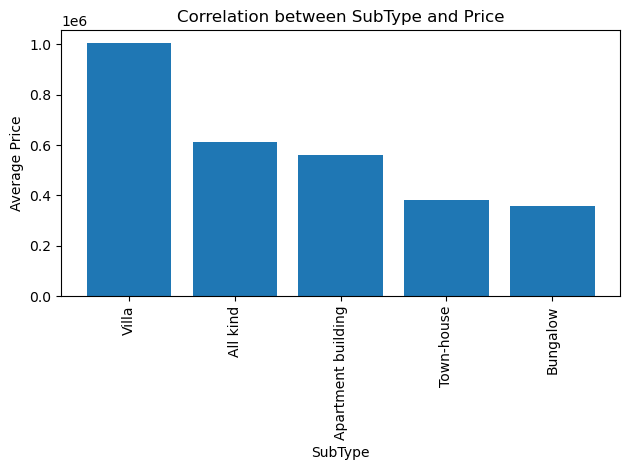

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

subtype_price = df[['Type of building', 'Price (€)']]
subtype_price = subtype_price.dropna()

avg_price = subtype_price.groupby('Type of building')['Price (€)'].mean().reset_index()
avg_price = avg_price.sort_values('Price (€)', ascending=False)

plt.bar(avg_price['Type of building'], avg_price['Price (€)'])
plt.xlabel('SubType')
plt.ylabel('Average Price')
plt.title('Correlation between SubType and Price')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()


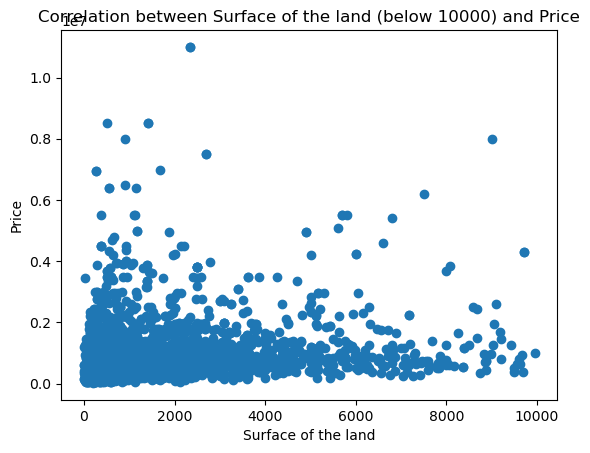

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

filtered_df = df[df['Surface of the plot (m²)'] < 10000]

surface_price = filtered_df[['Surface of the plot (m²)', 'Price (€)']]

surface_price = surface_price.dropna()

plt.scatter(surface_price['Surface of the plot (m²)'], surface_price['Price (€)'])
plt.xlabel('Surface of the land')
plt.ylabel('Price')
plt.title('Correlation between Surface of the land (below 10000) and Price')
plt.show()


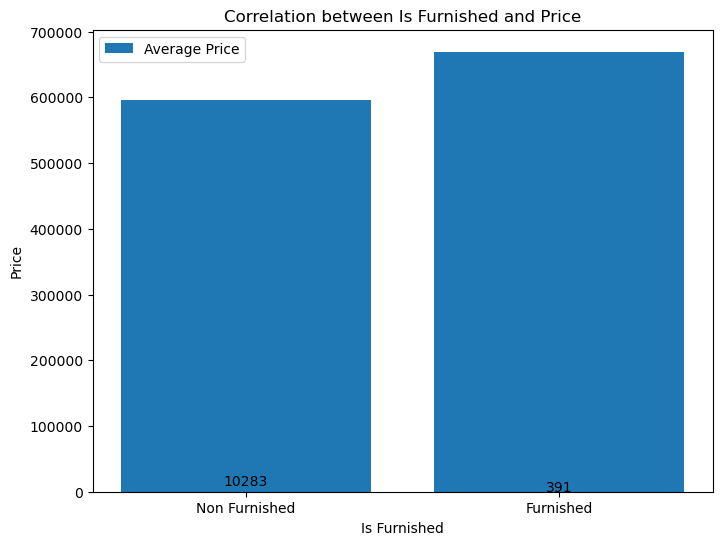

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

furnished_price = df.groupby('Furnished')['Price (€)'].mean()

count_properties = df['Furnished'].value_counts()

plt.figure(figsize=(8, 6))
x_labels = ['Non Furnished', 'Furnished']
x_values = range(len(x_labels))

plt.bar(x_values, furnished_price, label='Average Price')
plt.xticks(x_values, x_labels)
plt.xlabel('Is Furnished')
plt.ylabel('Price')
plt.title('Correlation between Is Furnished and Price')
plt.legend()

for i, count in enumerate(count_properties):
    plt.text(i, count + 10, str(count), ha='center')

plt.show()


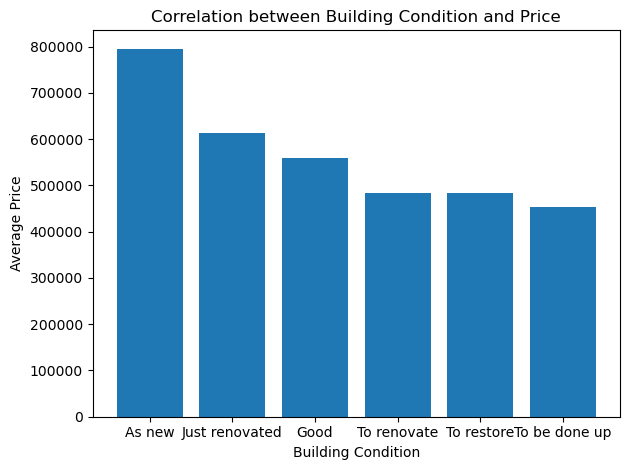

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

building_price = df[['Building condition', 'Price (€)']]

building_price = building_price.dropna()

avg_price = building_price.groupby('Building condition')['Price (€)'].mean().reset_index()

avg_price = avg_price.sort_values('Price (€)', ascending=False)

plt.bar(avg_price['Building condition'], avg_price['Price (€)'])
plt.xlabel('Building Condition')
plt.ylabel('Average Price')
plt.title('Correlation between Building Condition and Price')
plt.tight_layout()
plt.show()


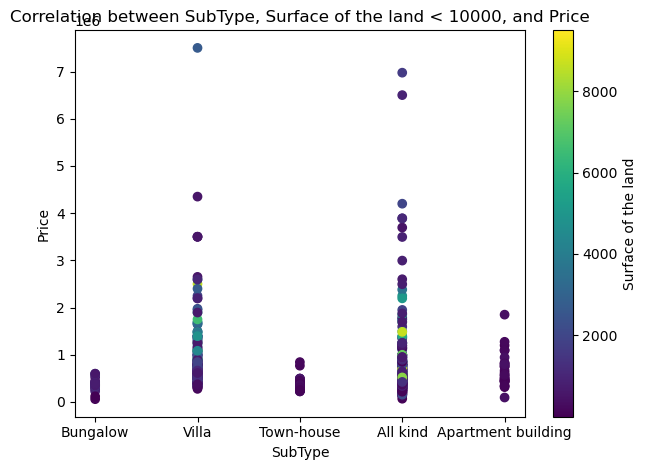

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

filtered_df = df[df['Surface of the plot (m²)'] < 10000]

subtype_surface_price = filtered_df[['Type of building', 'Surface of the plot (m²)', 'Price (€)']]

subtype_surface_price = subtype_surface_price.dropna()

plt.scatter(subtype_surface_price['Type of building'], subtype_surface_price['Price (€)'], c=subtype_surface_price['Surface of the plot (m²)'], cmap='viridis')
plt.xlabel('SubType')
plt.ylabel('Price')
plt.title('Correlation between SubType, Surface of the land < 10000, and Price')
plt.colorbar(label='Surface of the land')
plt.tight_layout()
plt.show()


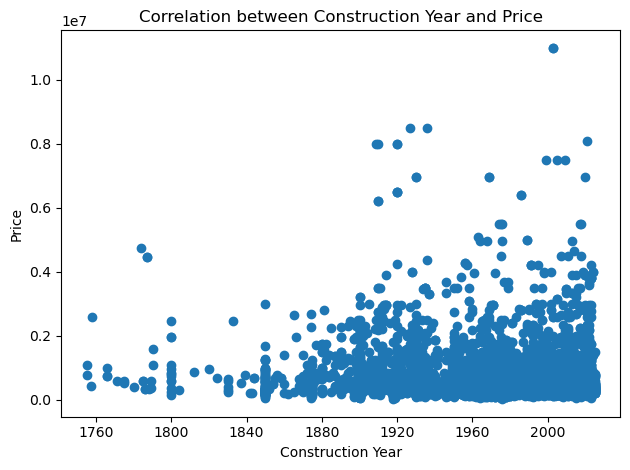

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

df['Construction year'] = pd.to_datetime(df['Construction year'], format='%Y', errors='coerce')

year_price = df[['Construction year', 'Price (€)']]

year_price = year_price.dropna()

x_min = year_price['Construction year'].min()
x_max = year_price['Construction year'].max()

plt.scatter(year_price['Construction year'], year_price['Price (€)'])
plt.xlabel('Construction Year')
plt.ylabel('Price')
plt.title('Correlation between Construction Year and Price')
plt.tight_layout()
plt.show()


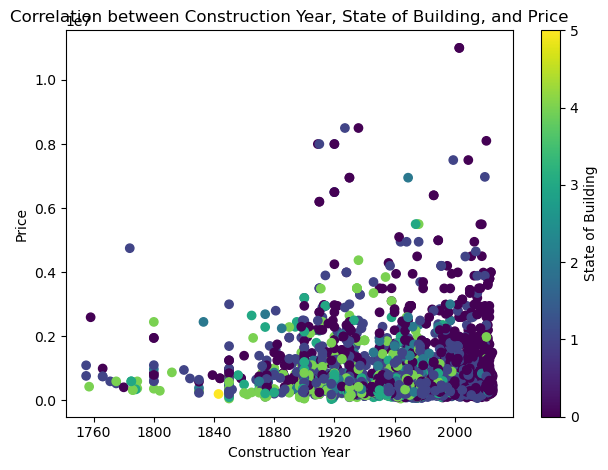

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

df['Construction year'] = pd.to_datetime(df['Construction year'], format='%Y', errors='coerce')

building_price_year = df[['Construction year', 'Building condition', 'Price (€)']]

building_price_year = building_price_year.dropna()

x_min = building_price_year['Construction year'].min()
x_max = building_price_year['Construction year'].max()

plt.scatter(building_price_year['Construction year'], building_price_year['Price (€)'], c=building_price_year['Building condition'].astype('category').cat.codes, cmap='viridis')
plt.xlabel('Construction Year')
plt.ylabel('Price')
plt.title('Correlation between Construction Year, State of Building, and Price')
plt.colorbar(label='State of Building')
plt.tight_layout()
plt.show()


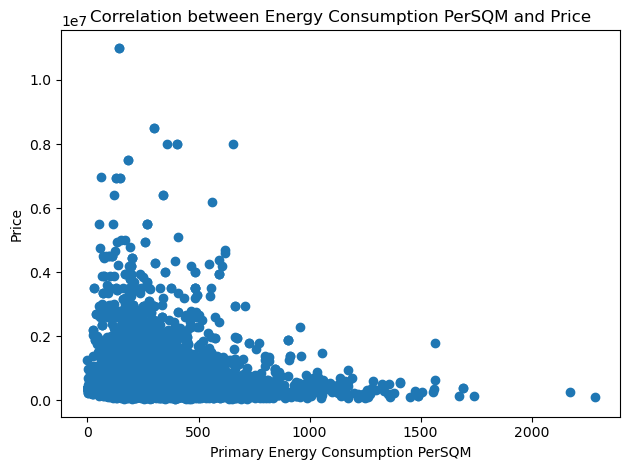

The lower Energy Consumption - higher the price


In [91]:
import pandas as pd
import matplotlib.pyplot as plt

filtered_df = df[df['Primary energy consumption (kWh/m²)'] < 5000]
energy_price = filtered_df[['Primary energy consumption (kWh/m²)', 'Price (€)']]

energy_price = energy_price.dropna()

plt.scatter(energy_price['Primary energy consumption (kWh/m²)'], energy_price['Price (€)'])
plt.xlabel('Primary Energy Consumption PerSQM')
plt.ylabel('Price')
plt.title('Correlation between Energy Consumption PerSQM and Price')
plt.tight_layout()
plt.show()
print('The lower Energy Consumption - higher the price')

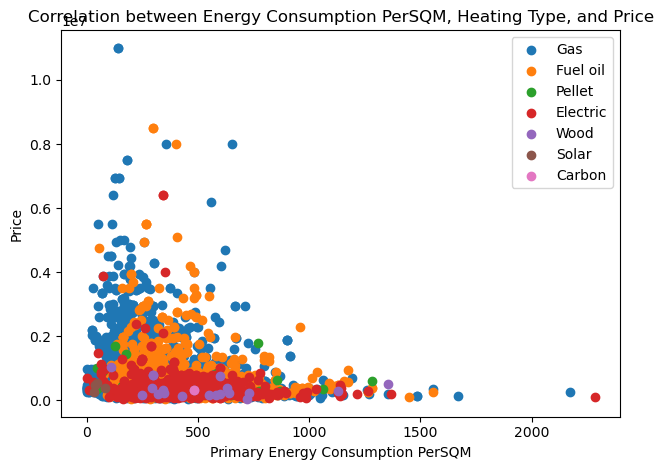

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

filtered_df = df[df['Primary energy consumption (kWh/m²)'] < 5000]

energy_price_heating = filtered_df[['Primary energy consumption (kWh/m²)', 'Heating type', 'Price (€)']]

energy_price_heating = energy_price_heating.dropna()

heating_types = energy_price_heating['Heating type'].unique()
for heating_type in heating_types:
    subset = energy_price_heating[energy_price_heating['Heating type'] == heating_type]
    plt.scatter(subset['Primary energy consumption (kWh/m²)'], subset['Price (€)'], label=heating_type)

plt.xlabel('Primary Energy Consumption PerSQM')
plt.ylabel('Price')
plt.title('Correlation between Energy Consumption PerSQM, Heating Type, and Price')
plt.legend()
plt.tight_layout()
plt.show()


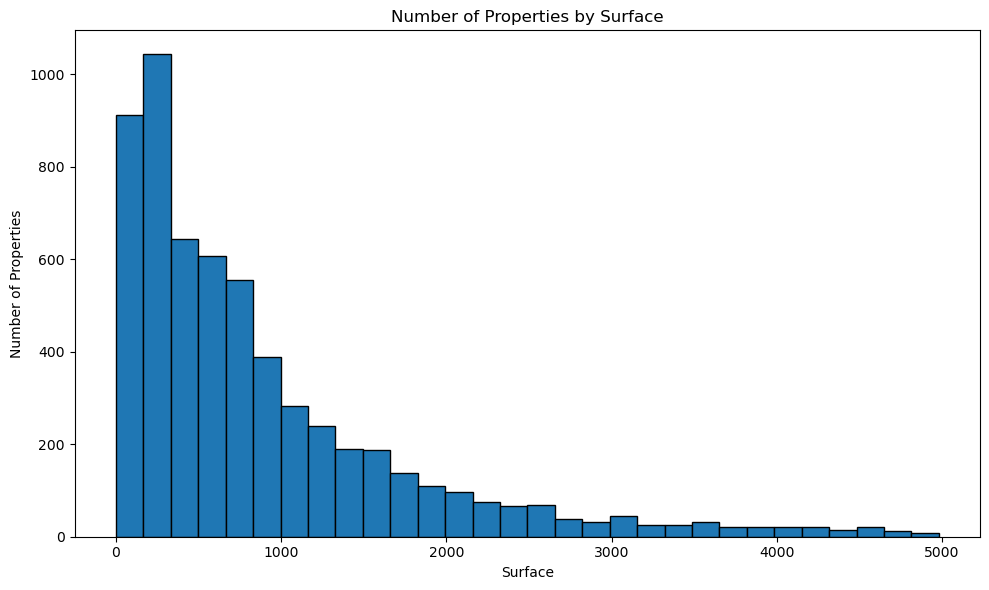

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

df_cleaned = df[df['Surface of the plot (m²)'] < 5000]

plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['Surface of the plot (m²)'], bins=30, edgecolor='black')
plt.xlabel('Surface')
plt.ylabel('Number of Properties')
plt.title('Number of Properties by Surface')
plt.tight_layout()
plt.show()
